# Projeto Final – Visualização de Dados em Python

## Tema: Estatísticas da Liga Portuguesa - 23/24

**Objetivo:**  
Analisar e visualizar dados de jogadores e equipas da Primeira Liga, explorando estatísticas de golos, assistências, cartões e evolução ao longo das temporadas. O projeto inclui análises descritivas, gráficos estáticos e interativos, e interpretações dos resultados.

---

## 1. Escolha e compreensão dos dados

**Dataset:** [Kaggle – Portugal Primeira Liga - 23/24](https://www.kaggle.com/datasets/bobzinho/portugal-primeira-liga-teams-and-players-data)  

**Variáveis principais:**
- `Season` → Época do campeonato  
- `Team` → Equipa  
- `Player` → Nome do jogador  
- `Position` → Posição do jogador  
- `Goals` → Golos marcados  
- `Assists` → Assistências  
- `YellowCards`, `RedCards` → Cartões  
- `MatchesPlayed` → Jogos disputados  

**Descrição:** O dataset contém estatísticas detalhadas de jogadores e equipas da Primeira Liga, permitindo análises individuais e coletivas.



## 1.2 Compreensão dos dados

Variáveis principais:

Season → Época do campeonato

Team → Nome da equipa

Player → Nome do jogador

Position → Posição do jogador

Goals → Golos marcados

Assists → Assistências

YellowCards, RedCards → Cartões

MatchesPlayed → Jogos disputados

Descrição: Cada linha representa um jogador numa temporada. Permite comparar desempenho entre jogadores, equipas e ao longo do tempo.

## 1.3.1 Preparação do ambiente e imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 1.3.2 Carregar os datasets

In [2]:
# Carregar CSV Equipas
df_teams = pd.read_csv("dados/PrimeiraLiga_teams.csv", encoding="utf-8")

# Mostrar primeiras linhas
df_teams.head()

,team_id,team_name,coach_name,home_stadium,founded_year,team_city
0,1,Boavista Futebol Clube,Ricardo Paiva,Estádio do Bessa,1903-08-01,Porto
1,2,Casa Pia Atlético Clube,Pedro Moreira,Estádio Pina Manique,1920-07-03,Lisboa
2,3,Clube de Futebol Estrela da Amadora,Filipe Martins,Estádio José Gomes,1932-01-22,Lisboa
3,4,Grupo Desportivo Estoril Praia,Álvaro Pacheco,Estádio António Coimbra da Mota,1939-05-17,Lisboa
4,5,Futebol Clube de Arouca,Daniel Ramos,Estádio Municipal de Arouca,1952-12-25,Aveiro


In [3]:
# Carregar CSV Jogadores
df_players = pd.read_csv("dados/PrimeiraLiga_players.csv", encoding="utf-8")
# Mostrar primeiras linhas
df_players.head()


,player_id,first_name,last_name,birth_date,nationality,position,preferred_foot,height,weight,team_id,matches_played,goals,assists,yellow_cards,red_cards,jersey_number,team_name
0,1,João,Gonçalves,2000-11-05,Portugal,Goalkeeper,Right,188.0,80.0,1,34,0,0,4,0,99,Boavista Futebol Clube
1,2,Pedro,Malheiro,2001-01-21,Portugal,Right Back,Right,179.0,72.0,1,23,2,2,9,1,79,Boavista Futebol Clube
2,3,Chidozie,Awaziem,1997-01-01,Nigeria,Center Back,Right,189.0,77.0,1,24,0,0,7,1,5,Boavista Futebol Clube
3,4,Vincent,Sasso,1991-02-16,France,Center Back,Right,190.0,78.0,1,17,2,0,3,0,23,Boavista Futebol Clube
4,5,Rodrigo,Abascal,1994-01-14,Uruguay,Center Back,Left,186.0,84.0,1,29,2,0,8,0,26,Boavista Futebol Clube


## 1.4 Análise Exploratória

## 1.4.1.Dimensões do dataset

In [4]:
print("Players:", df_players.shape)
print("Teams:", df_teams.shape)


Players: (454, 17)
Teams: (18, 6)


## 1.4.2 Tipos de variáveis

In [5]:
print("Tipos de variáveis - Players\n",df_players.dtypes)
print("\nTipos de variáveis - Equipas\n",df_teams.dtypes)


Tipos de variáveis - Players
 player_id           int64
first_name         object
last_name          object
birth_date         object
nationality        object
position           object
preferred_foot     object
height            float64
weight            float64
team_id             int64
matches_played      int64
goals               int64
assists             int64
yellow_cards        int64
red_cards           int64
jersey_number       int64
team_name          object
dtype: object

Tipos de variáveis - Equipas
 team_id          int64
team_name       object
coach_name      object
home_stadium    object
founded_year    object
team_city       object
dtype: object


## 1.4.3. Valores em falta

In [6]:
print("Valores em falta - Players\n",df_players.isna().sum())
print("\nValores em falta - Equipas\n",df_teams.isna().sum())


Valores em falta - Players
 player_id         0
first_name        0
last_name         0
birth_date        0
nationality       0
position          0
preferred_foot    0
height            0
weight            0
team_id           0
matches_played    0
goals             0
assists           0
yellow_cards      0
red_cards         0
jersey_number     0
team_name         0
dtype: int64

Valores em falta - Equipas
 team_id         0
team_name       0
coach_name      0
home_stadium    0
founded_year    0
team_city       0
dtype: int64


In [7]:
# Não foram encontrados valores em falta. Caso existissem, poderiam ser tratados com fillna() (substituição por média, mediana ou outro valor adequado) ou dropna().

# 2. Limpeza e preparação

## 2.1 Tratar de valores em falta, outliers e tipos de dados.
• Se necessário, cria novas variáveis derivadas (ex: taxas, médias, categorias agrupadas).

### 2.1.2 Tratar dos valores em falta(NaN)

In [8]:
# Exemplo de como tratar valores em falta (não aplicável neste dataset), pois acima vemos que não há valores em falta.
# Caso existisse, faríamos assim:
# df_players['Goals'] = df_players['Goals'].fillna(0)
# df_players['Assists'] = df_players['Assists'].fillna(0)
# df_players['MatchesPlayed'] = df_players['MatchesPlayed'].fillna(0)

### 2.1.3 Verifcar tipos de dados

In [9]:
df_players['goals'] = df_players['goals'].astype(int)
df_players['assists'] = df_players['assists'].astype(int)
df_players['matches_played'] = df_players['matches_played'].astype(int)
df_players['weight'] = df_players['weight'].astype(float)
df_players['height'] = df_players['height'].astype(float)



### 2.1.4 Outliers

In [10]:
# Outlier em relação a golos
Q1 = df_players['goals'].quantile(0.25)
Q3 = df_players['goals'].quantile(0.75)
IQR = Q3 - Q1

# Limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Jogadores considerados outliers
outliers = df_players[(df_players['goals'] < lower_bound) | (df_players['goals'] > upper_bound)]
outliers_sort = outliers.sort_values(by='goals', ascending=False)
outliers_count = len(outliers)
print(outliers_sort[['first_name', 'last_name', 'goals']])
print("\nNumero de outliers em golos:",outliers_count)



    first_name  last_name  goals
383     Viktor   Gyökeres     29
357      Simon      Banza     21
137       Rafa     Mujica     20
161    Jhonder      Cádiz     15
384   Paulinho  Fernandes     15
139     Cristo   González     15
215     Samuel    Essende     15
431       Rafa      Silva     14
240     Héctor  Hernández     14
191  Evanilson    Barbosa     13
405      Bruno     Duarte     13
453       Jota      Silva     11
385      Pedro  Gonçalves     11
306  Carlinhos     Santos     10
106  Alejandro    Marqués      9
425      Ángel   Di María      9
382  Francisco    Trincão      9
359    Ricardo      Horta      9
192  Wenderson     Galeno      9
17      Róbert    Bozeník      8
78       Kikas  Rodrigues      8
363     Álvaro      Djaló      8
107   Cassiano    Moreira      7
444       João     Mendes      7
337   Emmanuel    Boateng      7
404    Mohamed   Belloumi      7
430     Marcos   Leonardo      7
422      Orkun      Kökçü      7
132      Jason  Remeseiro      6
21       T

### 2.1.5. Criar novas variáveis derivadas

Por exemplo, é muito comum, calcular média de golos por jogo ou golos + assistências por jogo.

In [11]:
# Média de golos por jogo
df_players['goals_per_match'] = df_players['goals'] / df_players['matches_played']

# Golos + Assistências por jogo
df_players['contribution_per_match'] = (df_players['goals'] + df_players['assists']) / df_players['matches_played']


# 3. Análise Descritiva

## 3.1 Estatísticas básicas

In [12]:
# Estatísticas básicas para os jogadores
stats_players = df_players[['goals', 'assists', 'matches_played','goals_per_match', 'contribution_per_match']].describe()
print(stats_players)


            goals     assists  matches_played  goals_per_match  \
count  454.000000  454.000000      454.000000       453.000000   
mean     1.746696    1.262115       19.680617         0.072241   
std      3.197636    1.941648        9.579306         0.115180   
min      0.000000    0.000000        0.000000         0.000000   
25%      0.000000    0.000000       12.000000         0.000000   
50%      1.000000    0.000000       20.000000         0.034483   
75%      2.000000    2.000000       29.000000         0.093750   
max     29.000000   12.000000       34.000000         0.878788   

       contribution_per_match  
count              453.000000  
mean                 0.126670  
std                  0.161263  
min                  0.000000  
25%                  0.000000  
50%                  0.076923  
75%                  0.187500  
max                  1.151515  


In [13]:
#Há um jogador que teve na coluna matches_played = 0. Ou seja, a divisão x / 0 gera NaN (Not a Number). Por isso, esse jogador não conta no count da nova coluna. Daí aparecer menos 1 valor nas colunas novas geradas.

# Verificar quem é o jogador em questão
df_players[df_players['matches_played'] == 0][['first_name', 'last_name', 'matches_played', 'goals', 'assists']]

# Substituir por 0
df_players['goals_per_match'].fillna(0, inplace=True)
df_players['contribution_per_match'].fillna(0, inplace=True)

# Novo stats_payers, atualizado
print(stats_players)

            goals     assists  matches_played  goals_per_match  \
count  454.000000  454.000000      454.000000       453.000000   
mean     1.746696    1.262115       19.680617         0.072241   
std      3.197636    1.941648        9.579306         0.115180   
min      0.000000    0.000000        0.000000         0.000000   
25%      0.000000    0.000000       12.000000         0.000000   
50%      1.000000    0.000000       20.000000         0.034483   
75%      2.000000    2.000000       29.000000         0.093750   
max     29.000000   12.000000       34.000000         0.878788   

       contribution_per_match  
count              453.000000  
mean                 0.126670  
std                  0.161263  
min                  0.000000  
25%                  0.000000  
50%                  0.076923  
75%                  0.187500  
max                  1.151515  


C:\Users\utilizador\AppData\Local\Temp\ipykernel_19228\16407968.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_players['goals_per_match'].fillna(0, inplace=True)
C:\Users\utilizador\AppData\Local\Temp\ipykernel_19228\16407968.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

### 3.2 Padrões e tendências

#### 3.2.1 Golos
- A maioria dos jogadores marcou **0 a 2 golos** na temporada.
- Poucos jogadores marcaram golos muito altos (outliers).
- Indica que os golos estão **concentrados em poucos jogadores**, normalmente avançados.

#### 3.2.2 Assistências
- Mais de metade dos jogadores não fez nenhuma assistência.
- Poucos jogadores têm impacto ofensivo significativo (até 12 assistências).
- Tendência semelhante à dos golos: **concentração de contribuições em alguns jogadores**.

#### 3.2.3 Jogos realizados
- Média de jogos: 19.7 → nem todos os jogadores jogaram toda a temporada.
- Houve um jogador que não fez nenhum jogo enquanto outros jogaram todos os 34 jogos.
- Esta diferença afeta diretamente os valores de golos e assistências por jogo.

#### 3.2.4 Golos por jogo
- Média: 0.072 → em média, um jogador marca 1 golo a cada ~14 jogos.
- Máximo: 0.879 → jogadores ofensivos extremos têm impacto elevado por jogo.
- A maioria tem contribuições baixas por jogo.

#### 3.2.5 Contribuição por jogo (golos + assistências)
- Média: 0.126 → cada jogador contribui ofensivamente a cada ~8 jogos.
- Máximo: 1.15 → jogadores muito eficazes destacam-se significativamente.
- Concentração em **jogadores-chave** (avançados e médios ofensivos).


## 3.3 Conclusão dos padrões

- **Concentração de golos e assistências** em poucos jogadores → impacto ofensivo não é uniforme(jogadores destacam-se mais que outros).  
- **Distribuição por posição:** avançados marcam mais golos, médios criam assistências, defesas quase zero.  
- **Participação nos jogos:** Nem todos os jogadores jogam todos os jogos → explica valores baixos em média por jogo.  
- **Outliers de desempenho:** jogadores com `goals_per_match > 0.5` ou `contribution_per_match > 0.5` destacam-se da média geral.

# 3.4 - Correlações entre variáveis

In [14]:
# Selecionar colunas numéricas
numeric_cols = ['goals', 'assists', 'matches_played', 'goals_per_match', 'contribution_per_match']

# Calcular correlação
corr_matrix = df_players[numeric_cols].corr()

# Mostrar matriz de correlação
corr_matrix

,goals,assists,matches_played,goals_per_match,contribution_per_match
goals,1.000000,0.565733,0.422478,0.931624,0.866827
assists,0.565733,1.000000,0.471063,0.482358,0.767936
matches_played,0.422478,0.471063,1.000000,0.298203,0.338378
goals_per_match,0.931624,0.482358,0.298203,1.000000,0.895443
contribution_per_match,0.866827,0.767936,0.338378,0.895443,1.000000


- `goals` e `goals_per_match` têm correlação muito alta (0.93), como esperado, pois jogadores com mais golos geralmente têm alta média por jogo.

- `contribution_per_match` também se correlaciona fortemente com `goals` (0.87) e `goals_per_match` (0.90), mostrando que os melhores marcadores são geralmente os que mais contribuem no jogo.

- `assists` tem correlação moderada com `goals` (0.57) e alta com `contribution_per_match` (0.77), indicando que alguns jogadores compensam com assistências.

- `matches_played` tem correlação mais baixa, mostrando que o número de jogos não garante alta produtividade por jogo.

In [15]:
# Top 5 jogadores por golos
top_goals = df_players.sort_values(by='goals', ascending=False).head(5)
top_goals[['first_name', 'last_name', 'team_name', 'goals', 'matches_played', 'goals_per_match']]


,first_name,last_name,team_name,goals,matches_played,goals_per_match
383,Viktor,Gyökeres,Sporting Clube de Portugal,29,33,0.878788
357,Simon,Banza,Sporting Clube de Braga,21,28,0.750000
137,Rafa,Mujica,Futebol Clube de Arouca,20,30,0.666667
215,Samuel,Essende,Futebol Clube de Vizela,15,31,0.483871
161,Jhonder,Cádiz,Futebol Clube de Famalicão,15,30,0.500000


In [16]:
#Top 5 jogadores por contribuição por jogo (golos + assistencias):
top_contrib = df_players.sort_values(by='contribution_per_match', ascending=False).head(5)
top_contrib[['first_name', 'last_name', 'team_name', 'goals', 'assists', 'matches_played', 'contribution_per_match']]


,first_name,last_name,team_name,goals,assists,matches_played,contribution_per_match
383,Viktor,Gyökeres,Sporting Clube de Portugal,29,9,33,1.151515
357,Simon,Banza,Sporting Clube de Braga,21,5,28,0.928571
431,Rafa,Silva,Sport Lisboa e Benfica,14,12,30,0.866667
137,Rafa,Mujica,Futebol Clube de Arouca,20,3,30,0.766667
385,Pedro,Gonçalves,Sporting Clube de Portugal,11,12,32,0.718750


- Estes jogadores destacam-se claramente do resto da liga.

- Mostram não apenas muitos golos, mas também boa eficiência (per match).

- Permite identificar jogadores-chave e padrões de desempenho.

# 4. Visualização dos Dados

## 4.1 Distribuição de Golos (Histograma)

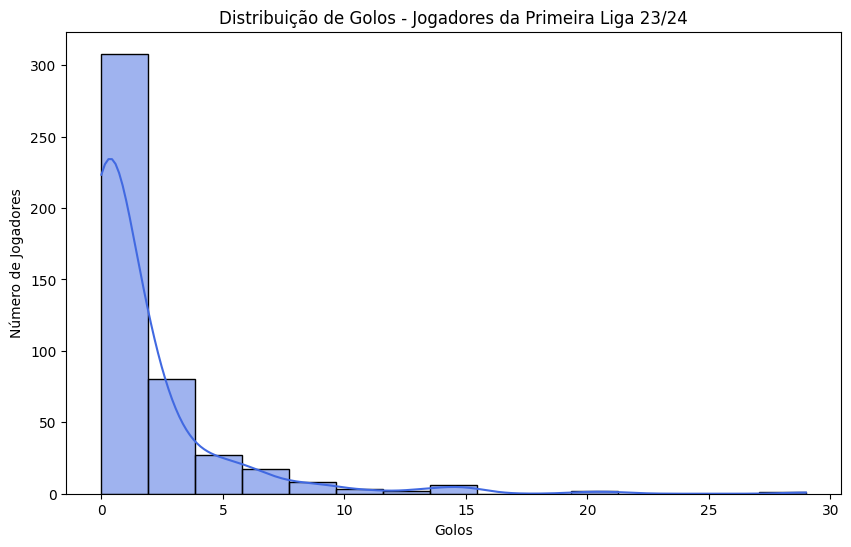

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df_players['goals'], bins=15, kde=True, color='royalblue')
plt.title("Distribuição de Golos - Jogadores da Primeira Liga 23/24")
plt.xlabel("Golos")
plt.ylabel("Número de Jogadores")
plt.show()


Como podemos ver, a maioria dos jogadores marcou poucos golos, com alguns outliers no topo (mais de 5 golos).

## 4.2 Boxplot de Goals per Match (Outliers)

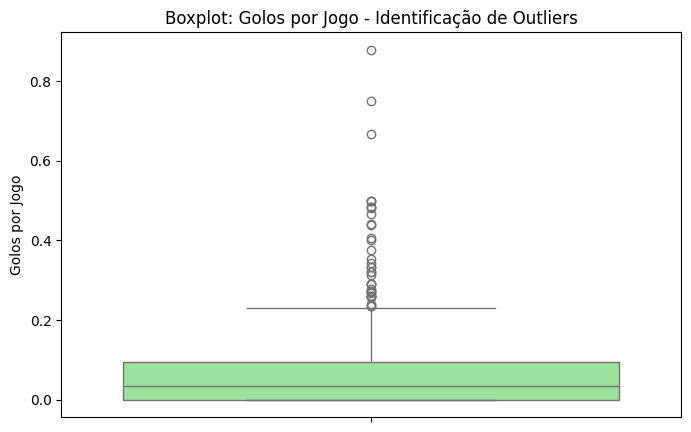

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df_players['goals_per_match'], color='lightgreen')
plt.title("Boxplot: Golos por Jogo - Identificação de Outliers")
plt.ylabel("Golos por Jogo")
plt.show()


## 4.3 Scatter Plot: Goals vs Assists

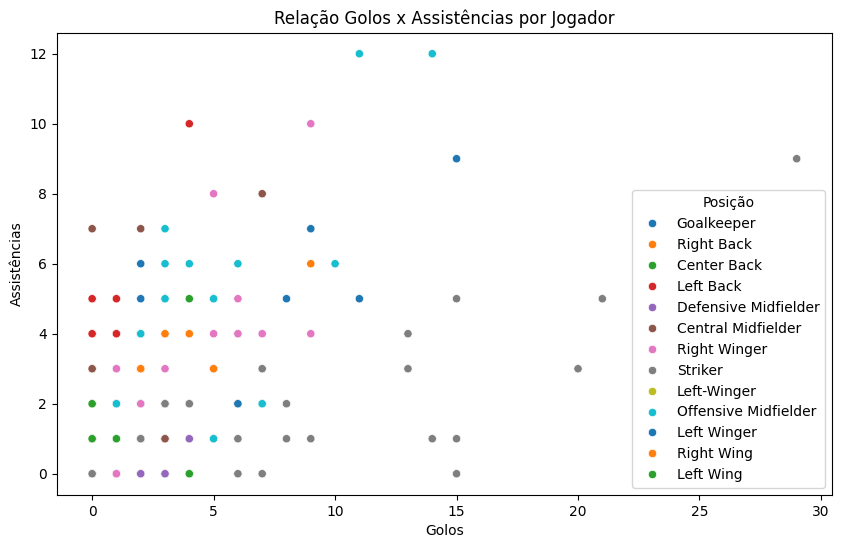

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_players, x='goals', y='assists', hue='position', palette='tab10')
plt.title("Relação Golos x Assistências por Jogador")
plt.xlabel("Golos")
plt.ylabel("Assistências")
plt.legend(title='Posição')
plt.show()


Alguns jogadores encontram-se equilibrados em golos e assistências, enquanto outros destacam-se em apenas num dos campos.

## 4.4 Heatmap de Correlação 

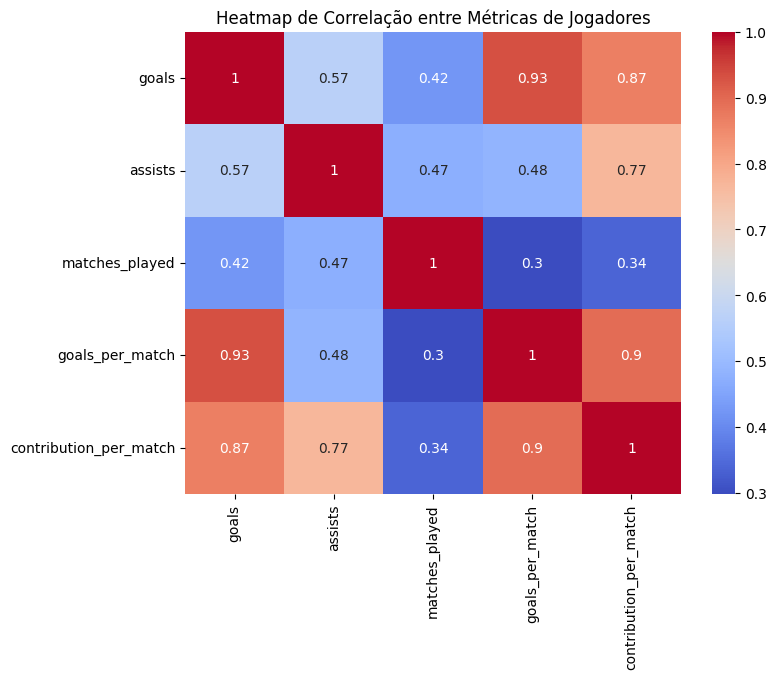

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df_players[['goals','assists','matches_played','goals_per_match','contribution_per_match']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlação entre Métricas de Jogadores")
plt.show()


Confirma a forte correlação entre `goals`, `goals_per_match` e `contribution_per_match`.

## 4.5 Scatter Interativo: Goals vs Contribution per Match (Plotly)

In [21]:
fig = px.scatter(
    df_players, x='goals_per_match', y='contribution_per_match',
    hover_data=['first_name','last_name','team_name','position'],
    color='position', size='matches_played',
    title="Golos por Jogo vs Contribuição por Jogo (Interativo)"
)
fig.update_layout(xaxis_title="Golos por Jogo", yaxis_title="Contribuição por Jogo")
fig.show()


Permite identificar rapidamente os jogadores que se destacam em produtividade por jogo, ver sua posição, equipa e número de jogos. Os círculos maiores indicam valores maiores na variável `matches_played`. Ou seja, jogadores que jogaram mais partidas aparecem com círculos maiores.

**Nota:** Caso os circulos estejam todos a cinzento, fazer restart do kernel pois pode conter cache.

# 5. Dashboard ou relatório interativo (Streamlit)

Para o desenvolvimento do dashboard interativo, optou-se pelo Streamlit devido à sua simplicidade de implementação e rápida configuração. Esta ferramenta permite criar visualizações interativas e filtros dinâmicos diretamente a partir de dataframes do Python, sem necessidade de construir uma aplicação web completa, como seria exigido com outras soluções, por exemplo, o Plotly Dash. 

Assim, o Streamlit proporciona uma forma eficiente e intuitiva de explorar os dados de jogadores e equipas da Primeira Liga, facilitando a interpretação das estatísticas e a comunicação dos resultados.

O código correspondente ao ponto 5 encontra-se no ficheiro projeto_streamlit.py, uma vez que o Streamlit não pode ser executado diretamente em ficheiros .ipynb. Para correr o dashboard, siga os passos indicados abaixo:

- Instalar o streamlit(caso nao tenha): 

```
pip install streamlit
```

- Executar o Streamlit no terminal:

```
streamlit run projeto_streamlit.py
```

Se o ficheiro estiver noutra pasta, usar o caminho completo ou proceder de estar no path do ficheiro primeiro:

```
streamlit run "C:\Users\...\projeto_streamlit.py"
```

# 6. Conclusão

Foi muito gratificante realizar este projeto, pois permitiu juntar duas áreas que gosto profundamente: a minha formação em desporto e a minha paixão pelo futebol, modalidade que pratico desde os 4 anos e que recentemente deixei de exercer federadamente, e a análise de dados, área que estou a estudar e que cada vez mais se torna essencial no futebol, onde decisões e estratégias são cada vez mais fundamentadas em números e estatísticas. Esta união tornou o trabalho mais motivador e envolvente.

A análise mostrou que a maioria dos jogadores tem contribuições baixas por jogo, com alguns outliers destacados em golos ou assistências. Observou-se também uma forte correlação entre golos e contribuição total, e a posição influencia claramente o desempenho ofensivo dos jogadores.

Entre os padrões identificados, destacam-se:

- Jogadores com golos por jogo elevados representam exceções, contribuindo significativamente para as equipas.

- A posição influencia claramente os valores médios de golos e assistências.

- Alguns jogadores com poucos jogos ainda apresentam contribuições por jogo muito altas, evidenciando talento individual.

Como limitações, salientam-se a restrição a uma única temporada e a ausência de variáveis contextuais, como minutos jogados ou estatísticas um pouco mais avançadas, que poderiam enriquecer a análise como por exemplo:  Key passes, Expected Goals (xG), Participação em jogadas, etc.

As visualizações, estáticas e interativas, ajudaram a identificar padrões, tendências e outliers. A experiência com o Streamlit revelou-se especialmente interessante e intuitiva, permitindo criar um dashboard interativo com filtros e gráficos dinâmicos, tornando a exploração dos dados muito mais rica. Gostei tanto desta abordagem que certamente a utilizarei em projetos futuros.

Em resumo, este projeto combinou conhecimento desportivo com análise de dados, reforçando competências em Python, visualização e interatividade, e proporcionou uma visão prática e divertida sobre o desempenho da Primeira Liga, mostrando como a análise de dados se torna cada vez mais fundamental no futebol moderno, onde estatísticas e métricas são decisivas para avaliar desempenho e tomar decisões estratégicas.